In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
%pip install pandas_datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 1.4 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from pandas_datareader import DataReader

In [66]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', data_source='stooq', start = '2010-01-01',end = '2019-12-31')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,71.0084,71.9246,70.9077,71.9176,1.030855e+08
2019-12-30,70.8938,71.6864,69.8549,71.3983,1.472306e+08
2019-12-27,71.3015,71.9974,70.5647,70.9755,1.494081e+08
2019-12-26,69.7592,71.0214,69.7303,71.0034,9.527219e+07
2019-12-24,69.7273,69.7762,69.2907,69.6226,4.948450e+07


In [67]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08
2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08


In [68]:
df = df.sort_index()
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08
2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08
...,...,...,...,...,...
2019-12-24,69.72730,69.77620,69.29070,69.62260,4.948450e+07
2019-12-26,69.75920,71.02140,69.73030,71.00340,9.527219e+07
2019-12-27,71.30150,71.99740,70.56470,70.97550,1.494081e+08


In [69]:
df = df.reset_index()

In [70]:
df = df.drop(['Date'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,6.49958,6.53008,6.46597,6.51522,5.764890e+08
1,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3,6.44444,6.45421,6.36409,6.41085,5.588893e+08
4,6.40586,6.45421,6.36458,6.45401,5.246856e+08


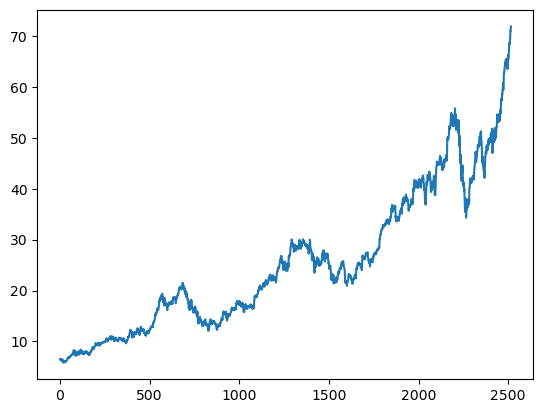

In [71]:
plt.plot(df.Close)

In [72]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    58.078106
2512    58.317804
2513    58.548341
2514    58.778101
2515    59.002407
Name: Close, Length: 2516, dtype: float64

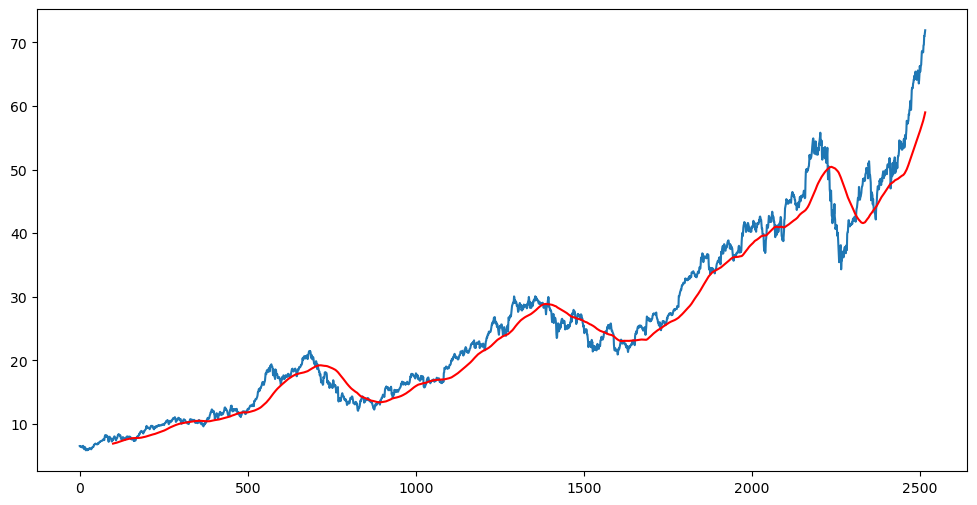

In [73]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [74]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    52.899952
2512    53.034801
2513    53.167063
2514    53.298542
2515    53.430315
Name: Close, Length: 2516, dtype: float64

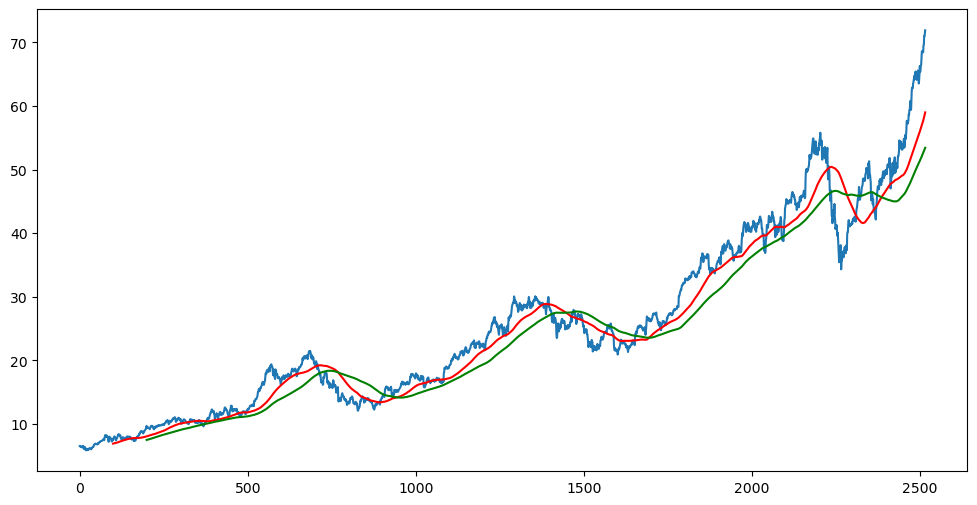

In [75]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [76]:
df.shape

(2516, 5)

In [78]:
#spiliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int((len(df))*0.70)])
data_testing = pd.DataFrame(df['Close'][int((len(df))*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [80]:
755/1761

0.4287336740488359

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [82]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02760483],
       [0.02806591],
       [0.02376554],
       ...,
       [0.89110796],
       [0.88637747],
       [0.88625364]])

In [86]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train    

[array([[2.76048334e-02],
        [2.80659115e-02],
        [2.37655428e-02],
        [2.32966218e-02],
        [2.50781913e-02],
        [2.27121217e-02],
        [1.97120181e-02],
        [2.33663821e-02],
        [2.18312438e-02],
        [1.74280922e-02],
        [2.89096390e-02],
        [2.47450758e-02],
        [2.01235623e-02],
        [7.15187054e-03],
        [1.38723833e-02],
        [1.74363479e-02],
        [1.98849740e-02],
        [9.10309368e-03],
        [8.25565110e-06],
        [3.38275304e-03],
        [4.76928964e-03],
        [9.02053717e-03],
        [0.00000000e+00],
        [4.28798518e-03],
        [2.62158201e-03],
        [5.21385645e-03],
        [3.88882445e-03],
        [8.33325422e-03],
        [1.04648633e-02],
        [1.42715441e-02],
        [1.31933560e-02],
        [1.36870440e-02],
        [1.20908138e-02],
        [1.05143972e-02],
        [6.30442796e-03],
        [1.08437977e-02],
        [1.25060731e-02],
        [1.57942989e-02],
        [2.1

In [87]:
x_train , y_train = np.array(x_train) , np.array(y_train)

In [ ]:
# ML model

In [ ]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [1]:
model = Sequential()

NameError: name 'Sequential' is not defined